In [ ]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import torch
#from scatwave.scattering import Scattering

In [84]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=False, batch_size=64,num_workers=1, pin_memory=True)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

print len(test)

10000


In [ ]:
print enumerate(train_loader)

In [ ]:
for i, data in enumerate(train_loader):
    #print(data[i][0])
    # PIL
    # print data[i][0].size() # torch.Size([1, 28, 28])
    # print data[i].size() # torch.Size([64, 1, 28, 28])
    # print size(data) # 2
    # print data.size() # data is a list with size 2
    img1 = transforms.ToPILImage()(data[i][0])
    img2 = transforms.ToPILImage()(data[i][1])
    #print "size of data: ", size(data[i]), i
    print i
    print size(img)
    #plot(img)
    break
#print img
#imgplot1 = plt.imshow(img1)

imgplot2 = plt.imshow(img2)

In [ ]:
for i, data in enumerate(train_loader):
    print i, size(data), data[0].size(), data[1].size(), data[1]

In [14]:
# Sample data from training data
# Sampled data size: 6400
partial_train_data = []
#partial_train_targets = []
partial_test_data = []
#partial_test_targets = []
batch_num = 100
for batch_idx, (data, target) in enumerate(train_loader):
    partial_train_data.append(data)
    #print "batch_idx: ", batch_idx
    if batch_idx == batch_num - 1:
        break
print len(partial_train_data)
# Sample data from training data
# Sampled data size: 1920
batch_num = 30
for batch_idx, (data, target) in enumerate(test_loader):
    partial_test_data.append(data)
    #print "batch_idx: ", batch_idx
    if batch_idx == batch_num - 1:
        break
print len(partial_test_data)

partial_train_data_temp = partial_train_data[0]
for i in range(1,len(partial_train_data)):
    partial_train_data_temp = torch.cat((partial_train_data_temp, partial_train_data[i]), 0)
partial_test_data_temp = partial_test_data[0]
for i in range(1,len(partial_test_data)):
    partial_test_data_temp = torch.cat((partial_test_data_temp, partial_test_data[i]), 0)
print partial_train_data_temp.size()
print partial_test_data_temp.size()

100
30
torch.Size([6400, 1, 28, 28])
torch.Size([1920, 1, 28, 28])


In [21]:
#partial_train_data_X = partial_train_data_temp.reshape
train_X = partial_train_data_temp
print Variable(train_X).size()
test_X = partial_test_data_temp
print Variable(test_X).size()
targetsNew = torch.load("targetsNew.pt")
targetsNew_test = torch.load("targetsNew_test.pt")
print targetsNew.size()
print targetsNew_test.size()

torch.Size([6400, 1, 28, 28])
torch.Size([1920, 1, 28, 28])
torch.Size([6400])
torch.Size([1920])


In [28]:
# Copy from: https://github.com/aaron-xichen/pytorch-playground/blob/master/mnist/model.py

import torch.nn as nn
from collections import OrderedDict
import torch.utils.model_zoo as model_zoo
#from utee import misc
#print = misc.logger.info

model_urls = {
    'mnist': 'http://ml.cs.tsinghua.edu.cn/~chenxi/pytorch-models/mnist-b07bb66b.pth'
}

class MLP(nn.Module):
    def __init__(self, input_dims, n_hiddens, n_class):
        super(MLP, self).__init__()
        assert isinstance(input_dims, int), 'Please provide int for input_dims'
        self.input_dims = input_dims
        current_dims = input_dims
        layers = OrderedDict()

        if isinstance(n_hiddens, int):
            n_hiddens = [n_hiddens]
        else:
            n_hiddens = list(n_hiddens)
        for i, n_hidden in enumerate(n_hiddens):
            layers['fc{}'.format(i+1)] = nn.Linear(current_dims, n_hidden)
            layers['relu{}'.format(i+1)] = nn.ReLU()
            layers['drop{}'.format(i+1)] = nn.Dropout(0.2)
            current_dims = n_hidden
        layers['out'] = nn.Linear(current_dims, n_class)

        self.model= nn.Sequential(layers)
        print(self.model)

    def forward(self, input):
        input = input.view(input.size(0), -1)
        assert input.size(1) == self.input_dims
        return self.model.forward(input)

def mnist(input_dims=784, n_hiddens=[256, 256], n_class=10, pretrained=None):
    model = MLP(input_dims, n_hiddens, n_class)
    if pretrained is not None:
        m = model_zoo.load_url(model_urls['mnist'])
        state_dict = m.state_dict() if isinstance(m, nn.Module) else m
        assert isinstance(state_dict, (dict, OrderedDict)), type(state_dict)
        model.load_state_dict(state_dict)
    return model


In [31]:
import argparse
import os
import time

#from utee import misc
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

#import dataset
#import model

model = mnist(input_dims=784, n_hiddens=[256, 256], n_class=10, pretrained=1)


Sequential (
  (fc1): Linear (784 -> 256)
  (relu1): ReLU ()
  (drop1): Dropout (p = 0.2)
  (fc2): Linear (256 -> 256)
  (relu2): ReLU ()
  (drop2): Dropout (p = 0.2)
  (out): Linear (256 -> 10)
)


Downloading: "http://ml.cs.tsinghua.edu.cn/~chenxi/pytorch-models/mnist-b07bb66b.pth" to /root/.torch/models/mnist-b07bb66b.pth
100%|██████████| 1078198/1078198 [00:01<00:00, 666175.66it/s]


In [32]:
print model

MLP (
  (model): Sequential (
    (fc1): Linear (784 -> 256)
    (relu1): ReLU ()
    (drop1): Dropout (p = 0.2)
    (fc2): Linear (256 -> 256)
    (relu2): ReLU ()
    (drop2): Dropout (p = 0.2)
    (out): Linear (256 -> 10)
  )
)


In [38]:
output = model(Variable(train_X))
loss = F.cross_entropy(output, Variable(targetsNew.cpu()))
print output

Variable containing:
-1.7924e+00 -4.9831e-01 -5.8046e-01  ...  -9.7483e-01 -7.9358e-02  8.1951e-01
 6.2894e+00 -1.4432e+00  2.6004e+00  ...  -8.5069e-01 -1.4046e+00  9.7241e-02
-1.2256e+00 -3.5706e-01 -9.0623e-02  ...   5.7789e-01 -6.1773e-02  5.4339e-01
                ...                   ⋱                   ...                
 3.2717e-01  8.3498e-01 -8.9561e-02  ...   3.7277e+00 -1.6445e+00  1.4731e+00
-2.4584e+00  2.6767e-01 -9.7188e-01  ...  -1.5949e+00  1.4351e+00  1.8144e+00
-1.9771e+00 -1.4208e+00  1.5893e-01  ...  -4.2553e+00  1.6080e+00  5.3891e-03
[torch.FloatTensor of size 6400x10]



In [47]:
import numpy as np
pred = output.data.max(1)[1]
correct = pred.cpu().eq(targetsNew.cpu()).sum()
acc = correct * 1.0 / len(data)
#print sum(output.data.numpy() == targetsNew.cpu().numpy())
print pred, correct, acc


 5
 0
 4
⋮ 
 7
 3
 5
[torch.LongTensor of size 6400]
 6292 98.3125


In [59]:
# extract feature from pretrained VGG19 net
#features_of_train_data = model.forward((Variable(train_X)))
#print features_of_train_data.size()

new_model = model
new_model.model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(784, 256)),
    ('relu1', nn.ReLU()),
    ('drop1', nn.Dropout(0.2)),
    ('fc2', nn.Linear(256, 256)),
    ('relu2', nn.ReLU()),
    ('drop2', nn.Dropout(0.2))
    #(out), Linear (256 -> 10)
    ]))
print new_model

MLP (
  (model): Sequential (
    (fc1): Linear (784 -> 256)
    (relu1): ReLU ()
    (drop1): Dropout (p = 0.2)
    (fc2): Linear (256 -> 256)
    (relu2): ReLU ()
    (drop2): Dropout (p = 0.2)
  )
)


In [61]:
features_of_train = model(Variable(train_X))
print features_of_train
print features_of_train.size()

Variable containing:
 0.0000  0.0000  0.1303  ...   0.0000  0.0226  0.0000
 0.0000  0.0000  0.2591  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0099  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.2712  ...   0.0168  0.0000  0.0000
 0.0331  0.0000  0.0794  ...   0.0000  0.0343  0.0000
 0.0000  0.0000  0.1370  ...   0.1869  0.0543  0.0000
[torch.FloatTensor of size 6400x256]

torch.Size([6400, 256])


In [73]:
features_of_test = model(Variable(test_X))
print features_of_test
print features_of_test.size()
torch.save(features_of_test,"features_of_test.pt")
torch.save(test_X,"test_X.pt")

Variable containing:
 0.0000  0.0000  0.0896  ...   0.0256  0.0577  0.0000
 0.1901  0.0000  0.0813  ...   0.1362  0.0526  0.0000
 0.0483  0.0000  0.0384  ...   0.0000  0.0160  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.1950  ...   0.0954  0.0312  0.0000
 0.0000  0.0000  0.2403  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.1459  ...   0.0186  0.0000  0.0000
[torch.FloatTensor of size 1920x256]

torch.Size([1920, 256])


In [ ]:
# Slow
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets, manifold

# slow Train dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
features_of_train_np = features_of_train.cpu().data.numpy()
nsamples = features_of_train_np.shape[0]
print size(features_of_train_np)
print features_of_train_np.shape
features_of_train_np_tsne = tsne.fit_transform(features_of_train_np)
print features_of_train_np_tsne.shape

1638400
(6400, 256)
(6400, 2)


In [79]:
features_of_test_np = features_of_test.cpu().data.numpy()
np.save("features_of_test_np",features_of_test_np)

In [66]:
np.save("features_of_train_np_tsne",features_of_train_np_tsne)

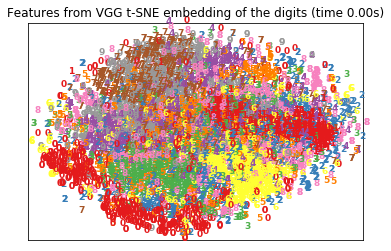

In [86]:
# Visualize the scat features
# Scale and visualize the embedding vectors                            
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

def plot_embedding(X, title=None):     
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)                           

    plt.figure()              
    ax = plt.subplot(111)      
    for i in range(X.shape[0]):                          
        plt.text(X[i, 0], X[i, 1], str(targets_np[i]),    
                 color=plt.cm.Set1(targets_np[i] / 10.),         
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

t0 = time()
plot_embedding(features_of_train_np_tsne,
               "Features from VGG t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

In [85]:
plt.savefig('vgg19-tsne.jpg')

In [82]:
# load data
#scatFeatures_np_d2 = np.load("scatFeatures_np_d2.npy")
#targets_np = np.load("targets_np.npy")
# slow when size of X is large
# SVM for scatFeatures_np_d2
from sklearn import svm
#X:scatFeatures_np_d2
#y:targets_np
clf = svm.SVC(C=100)
#clf = svm.SVC(decision_function_shape='ovo')
clf.fit(features_of_train_np, targets_np)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
pred = clf.predict(features_of_test_np)
print pred

[7 6 1 ..., 2 0 7]


In [81]:
# features_of_train_np SVM fit
#pred = clf.predict(features_of_test_np)
print "Test data size: ", targets_test_np.shape
#print sum(pred)
#print sum(pred == 1)
print "Prediction correct count: ", sum(pred == targets_test_np)
print "Precision: ", sum(pred == targets_test_np)*1.0/len(targets_test_np)

Test data size:  (1920,)
Prediction correct count:  1281
Precision:  0.6671875


In [8]:
# Sample data from training data
# Sampled data size: 6400
scatFeatures = [] # features
targets = [] # targets for training data
batch_num = 100
for batch_idx, (data, target) in enumerate(train_loader):
    scat = Scattering(M=28, N=28, J=2).cuda()
    #print scat(data.cuda()).size(), target.size()
    scatFeatures.append(scat(data.cuda()))
    targets.append(target.cuda())
    print "batch_idx: ", batch_idx
    if batch_idx == batch_num - 1:
        break
print len(scatFeatures), len(targets)

/usr/local/lib/python2.7/site-packages/scatwave-0.0.1-py2.7.egg/scatwave/scattering.py:82: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.


0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  0
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  1
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  2
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  3
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  4
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  5
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  6
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  7
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  8
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-

0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  79
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  80
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  81
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  82
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  83
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  84
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  85
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  86
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  87
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0

In [9]:
print len(scatFeatures), len(targets)
# Save sampled training data
torch.save(scatFeatures,"scatFeatures.pt")
torch.save(targets,"targets.pt")

100 100


In [ ]:
# Sample data from testing data
# Sampled data size: 1920 
scatFeatures_test = [] # features for testing data
targets_test = [] # targets for testing data
batch_num = 30
for batch_idx, (data, target) in enumerate(test_loader):
    scat = Scattering(M=28, N=28, J=2).cuda()
    #print scat(data.cuda()).size(), target.size()
    scatFeatures_test.append(scat(data.cuda()))
    targets_test.append(target.cuda())
    print "batch_idx: ", batch_idx
    if batch_idx == batch_num - 1:
        break
print len(scatFeatures_test), len(targets_test)

0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  0
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  1
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  2
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  3
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  4
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  5
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  6
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  7
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-18-periodize.cu
batch_idx:  8
0-64-4-36-36-periodize.cu
modulus.cu
0-64-2-36-36-periodize.cu
0-64-2-18-

In [4]:
# Save sampled training data
torch.save(scatFeatures_test,"scatFeatures_test.pt")
torch.save(targets_test,"targets_test.pt")

In [20]:
# find here
# This section is pretty fast
# load saved data
scatFeatures = torch.load("scatFeatures.pt")
targets = torch.load("targets.pt")
#scatFeatures[0].size()
scatFeaturesNew = scatFeatures[0]
targetsNew = targets[0]
for i in range(1,len(scatFeatures)):
    scatFeaturesNew = torch.cat((scatFeaturesNew, scatFeatures[i]), 0)
    targetsNew = torch.cat((targetsNew, targets[i]), 0)
print scatFeaturesNew.size()
print targetsNew.size()

torch.Size([6400, 1, 81, 7, 7])
torch.Size([6400])
torch.Size([6400])
torch.Size([1920])


In [5]:
# Used for VGG19 model
torch.save(scatFeaturesNew,"scatFeaturesNew.pt")
torch.save(targetsNew,"targetsNew.pt")

In [6]:
# This section is pretty fast
scatFeatures_test = torch.load("scatFeatures_test.pt")
targets_test = torch.load("targets_test.pt")
scatFeaturesNew_test = scatFeatures_test[0]
targetsNew_test = targets_test[0]
for i in range(1,len(scatFeatures_test)):
    scatFeaturesNew_test = torch.cat((scatFeaturesNew_test, scatFeatures_test[i]), 0)
    targetsNew_test = torch.cat((targetsNew_test, targets_test[i]), 0)
print scatFeaturesNew_test.size()
print targetsNew_test.size()

torch.Size([1920, 1, 81, 7, 7])
torch.Size([1920])


In [7]:
# Used for VGG19 model
torch.save(scatFeaturesNew_test,"scatFeaturesNew_test.pt")
torch.save(targetsNew_test,"targetsNew_test.pt")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets, manifold

In [12]:
# slow Train dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
scatFeatures_np = scatFeaturesNew.cpu().numpy()
nsamples = scatFeatures_np.shape[0]
scatFeatures_np_d2 = scatFeatures_np.reshape((nsamples, 49*81))
print size(scatFeatures_np_d2)
print scatFeatures_np_d2.shape
#scatFeatures_np_d2_tsne = tsne.fit_transform(scatFeatures_np_d2)
#print scatFeatures_np_d2_tsne.shape

25401600
(6400, 3969)


In [8]:
# slow Test dataset
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
scatFeatures_test_np = scatFeaturesNew_test.cpu().numpy()
nsamples = scatFeatures_test_np.shape[0]
scatFeatures_test_np_d2 = scatFeatures_test_np.reshape((nsamples, 49*81))
print size(scatFeatures_test_np_d2)
print scatFeatures_test_np_d2.shape
#scatFeatures_test_np_d2_tsne = tsne.fit_transform(scatFeatures_test_np_d2)
#print scatFeatures_test_np_d2_tsne.shape

7620480
(1920, 3969)


In [10]:
# Two dimension data
#np.save('scatFeatures_np_d2.npy', scatFeatures_np_d2)
#np.save('scatFeatures_np_d2_tsne.npy', scatFeatures_np_d2_tsne)
np.save('scatFeatures_test_np_d2.npy', scatFeatures_test_np_d2)

In [9]:
np.save('scatFeatures_test_np_d2_tsne.npy', scatFeatures_test_np_d2_tsne)

In [68]:
# pretty fast
targets_np = targetsNew.cpu().numpy()
# targets_np
np.save('targets_np.npy', targets_np)
print targets_np[0]
targets_test_np = targetsNew_test.cpu().numpy()
np.save('targets_test_np.npy', targets_test_np)
print targets_test_np[0]

5
7


In [31]:
print targets_np[0:10]
print targets_test_np[0:10]

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [14]:
scatFeatures_np_d2_tsne = np.load('scatFeatures_np_d2_tsne.npy')
targets_np = np.load('targets_np.npy')

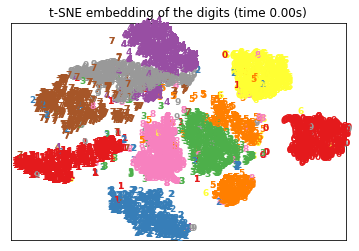

In [4]:
# Visualize the scat features
# Scale and visualize the embedding vectors                            
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

def plot_embedding(X, title=None):     
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)                           

    plt.figure()              
    ax = plt.subplot(111)      
    for i in range(X.shape[0]):                          
        plt.text(X[i, 0], X[i, 1], str(targets_np[i]),    
                 color=plt.cm.Set1(targets_np[i] / 10.),         
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

t0 = time()
plot_embedding(scatFeatures_np_d2_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

In [5]:
plt.savefig('scat-tsne.jpg')

In [35]:
print size(targets_np)
print sum(targets_np==0)
print sum(targets_np==1)
print sum(targets_np==2)
print sum(targets_np==3)
print sum(targets_np==4)
print sum(targets_np==5)
print sum(targets_np==6)
print sum(targets_np==7)
print sum(targets_np==8)
print sum(targets_np==9)

print size(targets_test_np)
print sum(targets_test_np==0)
print sum(targets_test_np==1)
print sum(targets_test_np==2)
print sum(targets_test_np==3)
print sum(targets_test_np==4)
print sum(targets_test_np==5)
print sum(targets_test_np==6)
print sum(targets_test_np==7)
print sum(targets_test_np==8)
print sum(targets_test_np==9)

6400
628
718
624
650
660
552
645
693
587
643
1920
170
226
210
199
206
172
166
197
185
189


In [36]:
print scatFeatures_np_d2.shape
print targets_np.shape

(6400, 3969)
(6400,)


In [ ]:
# load data
scatFeatures_np_d2 = np.load("scatFeatures_np_d2.npy")
targets_np = np.load("targets_np.npy")
# slow when size of X is large
# SVM for scatFeatures_np_d2
from sklearn import svm
#X:scatFeatures_np_d2
#y:targets_np
clf = svm.SVC(C=100)
#clf = svm.SVC(decision_function_shape='ovo')
clf.fit(scatFeatures_np_d2, targets_np)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
# not easy to train, save it
from sklearn.externals import joblib
joblib.dump(clf, 'clf.pkl') 

['clf.pkl']

In [50]:
#X_test:scatFeatures_test_np_d2_tsne
#y:targets_test_np
# load SVM model   
from sklearn.externals import joblib
clf = joblib.load('clf.pkl')
scatFeatures_test_np_d2 = np.load("scatFeatures_test_np_d2.npy")
pred = clf.predict(scatFeatures_test_np_d2)

#ScatNet+SVM results:

In [52]:
targets_test_np = np.load("targets_test_np.npy")
print "Test data size: ", targets_test_np.shape
#print sum(pred)
#print sum(pred == 1)
print "Prediction correct count: ", sum(pred == targets_test_np)
print "Precision: ", sum(pred == targets_test_np)*1.0/len(targets_test_np)

(1920,)
1775
0.924479166667


# Experiment Environments
Using 6400 of 60000 data from training set as training data. And 1960 data from 10000 data from test set as testing data. For my machine is not so good, this can save much time.
The framework is PyTorch. Using this lib to extract ScatNet features: https://github.com/edouardoyallon/pyscatwave
And this model to extract VGG19 features: https://github.com/aaron-xichen/pytorch-playground/blob/master/mnist/model.py
For both of above features, first using t-SNE to visulize them, them classify them using trained SVM.
#Results
##Features Visulization
Features from ScatNet:
![scat-tsne.jpg.png](./scat-tsne.jpg.png)
Features from VGG19:
![vgg19-tsne.jpg.png](./vgg19-tsne.jpg.png)
##Classifacation
Classification using SVM, applying extracted features from VGG19 network as inputs:
Test data size:  (1920,)
Prediction correct count:  1281
Precision:  0.6671875
Classification using SVM, applying extracted features from ScatNet network as inputs:
(1920,)
1775
0.924479166667
#Conclusion
For VGG19 extracted feature, using SVM is not a good idea. It's better to use neural network to carry out the classification task.